<a href="https://colab.research.google.com/github/Matinnorouzi2023/Data-structure/blob/main/wind_turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Data preparation

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [25]:
df= pd.read_csv('DT_WT.csv')
print(df.shape)
df.head()
#df.describe()

(40058, 5)


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
df=df[df['LV ActivePower (kW)']>0]

df=df.dropna()
df.shape
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [28]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()

data_process=df[['Wind Speed (m/s)','Wind Direction (°)','Theoretical_Power_Curve (KWh)']]
data_process=scaler.fit_transform(data_process)

data_process[:5]

array([[-0.87988242,  1.70238309, -1.04070767],
       [-0.78435611,  1.80259878, -0.96200288],
       [-0.90511194,  1.84807695, -1.06002809],
       [-0.78766341,  1.83293136, -0.96488241],
       [-0.80930146,  1.76821115, -0.98343979]])

# 2- Data visualization

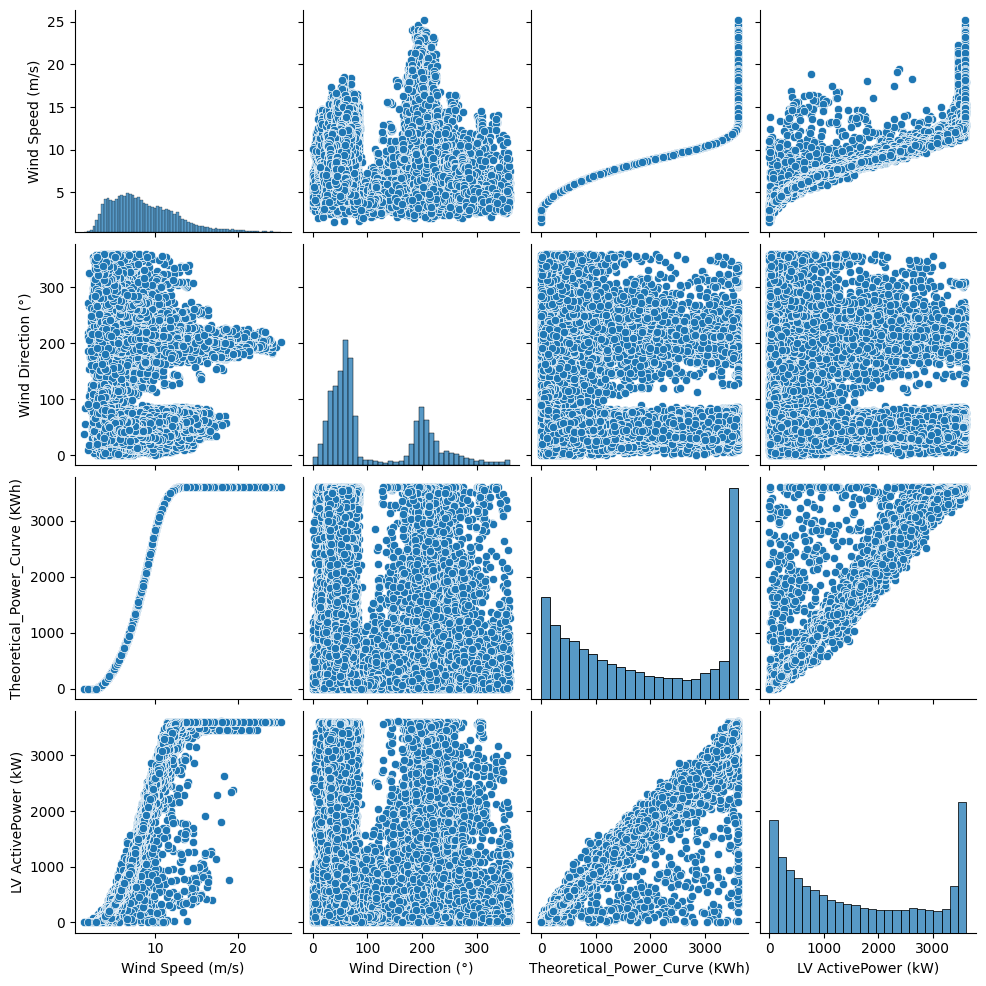

In [29]:
sns_plot = sns.pairplot(data = df, vars=['Wind Speed (m/s)','Wind Direction (°)','Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)'])
sns_plot.figure.savefig('output.png')

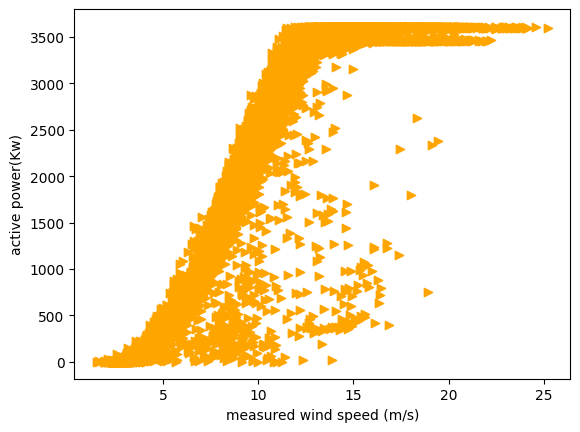

In [30]:
plt.scatter(df['Wind Speed (m/s)'],df['LV ActivePower (kW)'], color='orange', marker='>')
plt.xlabel('measured wind speed (m/s)')
plt.ylabel('active power(Kw)')
plt.savefig('scatterplot1.png')
plt.show()

# 3- Multiple Linear Regression

In [31]:
from sklearn.model_selection import train_test_split

x = data_process
y = df['LV ActivePower (kW)']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.85, random_state= 1)

print('train', xtrain.shape, ytrain.shape)
print('test', xtest.shape, ytest.shape)

train (26642, 3) (26642,)
test (4702, 3) (4702,)


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

print(model.coef_)
print(model.intercept_)

print('formula:  Active power=', model.coef_[0],'* ws+',model.coef_[1],'* wd+',model.coef_[2],'* tpc+',model.intercept_)

[ 175.79333598   22.37428192 1074.92727974]
1623.5476330176136
formula:  Active power= 175.79333597674832 * ws+ 22.37428192320567 * wd+ 1074.927279736077 * tpc+ 1623.5476330176136


# 4- Model Evaluation

In [33]:
ypred = model.predict(xtest)
ypred.shape

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('mean_squared_error:', mse)
print('mean_absolute_error:', mae)
print('r2_score:', r2)

mean_squared_error: 65890.2089289041
mean_absolute_error: 130.82713994058037
r2_score: 0.9584721926396892


In [34]:
sample = {'Wind Speed (m/s)': [10.45, 6.85, 2.25],'Wind Direction (°)': [225.12, 126.14, 165],'Theoretical_Power_Curve (KWh)': [3400, 1564, 1200]}

sdf = pd.DataFrame(sample)
sample_normal = scaler.fit_transform(sdf)

In [35]:
y_sample = model.predict(sample_normal)
y_sample

array([3360.6908599 , 1067.96933873,  441.98270042])